In [38]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show

from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [39]:
import pandas as pd
data = pd.read_excel("/Users/wangfei/Documents/Courses/CS/CS412/HW/HW1/R/glass/glass.xlsx")
data = np.asarray(data)
data

array([[ 1.     ,  1.51761,  7.83   ],
       [ 1.     ,  1.51618,  7.78   ],
       [ 1.     ,  1.51766,  8.22   ],
       [ 1.     ,  1.51742,  8.07   ],
       [ 1.     ,  1.51596,  8.07   ],
       [ 1.     ,  1.51743,  8.17   ],
       [ 1.     ,  1.51756,  8.24   ],
       [ 1.     ,  1.51918,  8.3    ],
       [ 1.     ,  1.51755,  8.4    ],
       [ 1.     ,  1.51571,  8.09   ],
       [ 1.     ,  1.51763,  8.56   ],
       [ 1.     ,  1.51589,  8.05   ],
       [ 1.     ,  1.51748,  8.38   ],
       [ 1.     ,  1.51763,  8.5    ],
       [ 1.     ,  1.51761,  8.39   ],
       [ 1.     ,  1.51784,  8.7    ],
       [ 1.     ,  1.52196,  9.15   ],
       [ 1.     ,  1.51911,  8.89   ],
       [ 1.     ,  1.51735,  8.44   ],
       [ 1.     ,  1.5175 ,  8.52   ],
       [ 1.     ,  1.51966,  9.     ],
       [ 1.     ,  1.51736,  8.7    ],
       [ 1.     ,  1.51751,  8.59   ],
       [ 1.     ,  1.5172 ,  8.43   ],
       [ 1.     ,  1.51764,  8.53   ],
       [ 1.     ,  1.5179

In [44]:
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1. or row[0]==2.):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [45]:
## Use the two features that you created for your 2D graph in HW1 
def ExtractFeat(dataset,label):
    X = []   ##mean
    Y = []   ##std
    colors = []
    for index in range(len(dataset)):
        X.append(np.mean(dataset[index]))
        Y.append(np.std(dataset[index]))  
        if(label[index]=="1.0"):
            colors.append("b")
        else:
            colors.append("r")
    return [X, Y, colors];
    
##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;

In [48]:
##normalize two features
###training features
Xnorm = normalize(ExtractFeat(trainFeatures,trainDigits)[0])
Ynorm = normalize(ExtractFeat(trainFeatures,trainDigits)[1])
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))
###testing features
Xnorm_test = normalize(ExtractFeat(testFeatures,testDigits)[0])
Ynorm_test = normalize(ExtractFeat(testFeatures,testDigits)[1])
Xnorm_test = np.asarray(Xnorm_test)
Ynorm_test = np.asarray(Ynorm_test)
simpleTest = np.column_stack((Xnorm_test,Ynorm_test))

## 3 Support Vector Machines


In [51]:
c = np.logspace(-2,2,num=40,endpoint=True)
def cv_err(model):
    err_bar = []
    err_mean = []
    for index in range(40):
        if(kernel=='linear'):
            svc = SVC(kernel = kernel, gamma = gamma, C = c[index])
        elif(kernel=='poly'):
            svc = SVC(kernel = kernel, degree = degree, gamma = gamma, C = c[index])
        elif(kernel=='rbf'):
            svc = SVC(kernel = kernel, gamma = gamma, C =c[index]) 
        else:
            print('Kernel not defined.')
        acc = cross_val_score(svc, simpleTrain, trainDigits, cv=10)
        err = 1 - acc
        err_mean.append(err.mean())
        err_bar.append(1.96 * err.std())
        cv = [err_mean,err_bar]
        upper_bound = np.asarray(cv[0])+np.asarray(cv[1])
        min_upper_bound = np.min(upper_bound)
        indx = np.argmin(upper_bound)
        opt = c[indx]
    return [err_mean,err_bar,opt,indx]


In [57]:
cv_err('rbf',gamma = 'auto', degree = 10)

[[0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.5,
  0.5,
  0.4333333333333334,
  0.375,
  0.375,
  0.35,
  0.35,
  0.35,
  0.35,
  0.38333333333333336,
  0.35,
  0.35,
  0.35,
  0.38333333333333336,
  0.38333333333333336,
  0.4166666666666667,
  0.4166666666666667,
  0.4166666666666667,
  0.3666666666666667,
  0.3666666666666667,
  0.3666666666666667],
 [0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.14969747270189074,
  0.3578454042367085,
  0.3578454042367085,
  0.5505084518475221,
  0.6078546061536609,
  0.6078546

In [18]:
cv_err_2d_linear

[[0.3300067204301076,
  0.3236559139784947,
  0.3042943548387097,
  0.24975134408602145,
  0.19268817204301075,
  0.1636491935483871,
  0.1570967741935484,
  0.14762096774193548,
  0.14127016129032258,
  0.14449596774193546,
  0.14116263440860216,
  0.14116263440860216,
  0.13168682795698924,
  0.13168682795698924,
  0.12846102150537636,
  0.11565860215053765,
  0.11243279569892475,
  0.10295698924731182,
  0.09962365591397851,
  0.09004704301075268,
  0.08047043010752689,
  0.07734543010752688,
  0.07734543010752688,
  0.07411962365591399,
  0.06766801075268818,
  0.05506720430107527,
  0.0484005376344086,
  0.0484005376344086,
  0.0484005376344086,
  0.0484005376344086,
  0.0419489247311828,
  0.03216397849462366,
  0.03216397849462366,
  0.03216397849462366,
  0.035389784946236555,
  0.035389784946236555,
  0.035389784946236555,
  0.038615591397849466,
  0.03549059139784947,
  0.03549059139784947],
 [0.01868260564032665,
  0.028689362829141824,
  0.05924179464010205,
  0.07955839939

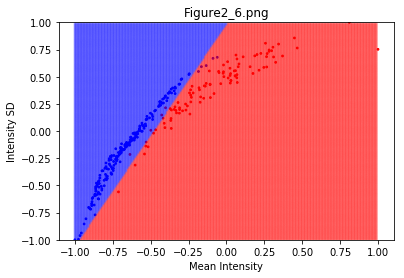

0.967948717948718

In [17]:
#2D space with optimal C  Figure 2.6
def c_opt(cv):
    upper_bound = np.asarray(cv[0])+np.asarray(cv[1])
    min_upper_bound = np.min(upper_bound)
    indx = np.argmin(upper_bound)
    return c[indx];
c_opt(cv_err_2d_linear)  #30.702906297578497
#SVM with optimal C  linear Figure 2.6
svm_opt = SVC(kernel = 'linear', C = c_opt(cv_err_2d_linear))
svm_opt_fit = svm_opt.fit(simpleTrain, trainDigits)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_6.png',plotType=1,model=svm_opt_fit,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
accuracy(svm_opt_fit)  #0.967948717948718

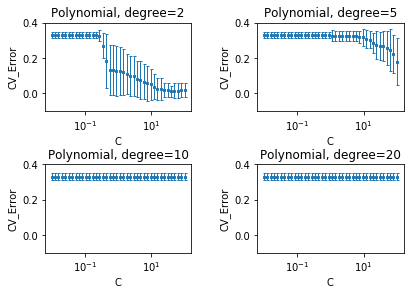

In [18]:
#polynomial kernel  2D
cv_err_2d_poly2 = cv_err('poly', 2, gamma='auto', degree=2)
cv_err_2d_poly5 = cv_err('poly', 2, gamma='auto', degree=5)
cv_err_2d_poly10 = cv_err('poly', 2, gamma='auto', degree=10)
cv_err_2d_poly20 = cv_err('poly', 2, gamma='auto', degree=20)
c_opt_2d_poly_models = (cv_err_2d_poly2,cv_err_2d_poly5,cv_err_2d_poly10,cv_err_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7.png',plotType=2,model=c_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')   

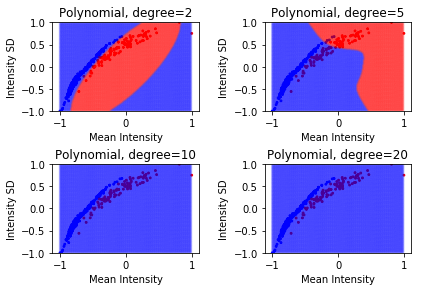

In [19]:
c_opt_2d_poly2 = c_opt(cv_err_2d_poly2) 
c_opt_2d_poly5 = c_opt(cv_err_2d_poly5)
c_opt_2d_poly10 = c_opt(cv_err_2d_poly10)
c_opt_2d_poly20 = c_opt(cv_err_2d_poly20)
c_opt_2d_poly2, c_opt_2d_poly5, c_opt_2d_poly10, c_opt_2d_poly20  
#(38.88155180308085, 100.0, 0.01, 0.01)

def opt_model(kernel, C, gamma=1, degree=3):
    opt_model = SVC(kernel=kernel,degree=degree,C=C,gamma=gamma)
    opt_model = opt_model.fit(simpleTrain,trainDigits)
    return opt_model;

svm_opt_2d_poly2 = opt_model('poly',c_opt_2d_poly2,gamma='auto',degree=2)
svm_opt_2d_poly5 = opt_model('poly',c_opt_2d_poly5,gamma='auto',degree=5)
svm_opt_2d_poly10 = opt_model('poly',c_opt_2d_poly10,gamma='auto',degree=10)
svm_opt_2d_poly20 = opt_model('poly',c_opt_2d_poly20,gamma='auto',degree=20)
#decision boundary for various polynomial degrees at their optimal C's 
svm_opt_2d_poly_models = (svm_opt_2d_poly2,svm_opt_2d_poly5,svm_opt_2d_poly10,svm_opt_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_8.png',plotType=1,model=svm_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

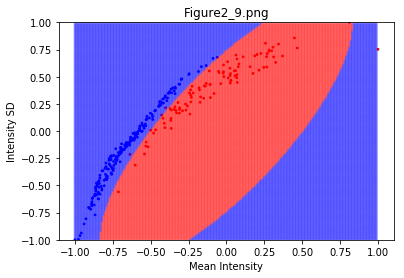

In [20]:
def min_upper(degree):
    upper_bound_degree = np.asarray(degree[0])+np.asarray(degree[1])
    min_upper = np.min(upper_bound_degree)
    return min_upper;
[min_upper(cv_err_2d_poly2), min_upper(cv_err_2d_poly5), 
 min_upper(cv_err_2d_poly10), min_upper(cv_err_2d_poly20)] 
#degree 2 and c=c_opt_2d_poly2 optimizes the 2D polynomial model. Save as Figure 2.9
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_9.png',plotType=1,model=svm_opt_2d_poly2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

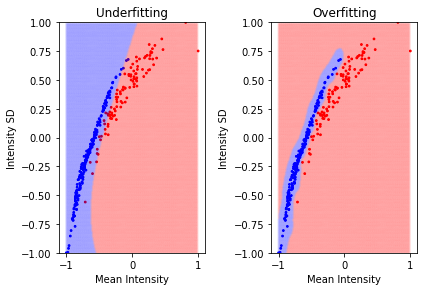

NameError: name 'svm_opt_2d_poly2' is not defined

In [19]:
svm_under = SVC(C=1, kernel='rbf', degree = 2, gamma=1).fit(simpleTrain,trainDigits)
svm_over = SVC(C=1, kernel='rbf', degree = 2, gamma=200).fit(simpleTrain,trainDigits)
plot(grid1=1,grid2=2,plotNum=2,fileName='Figure2_9.png',plotType=1,model=[svm_under,svm_over],
     subtitle=('Underfitting','Overfitting'),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
[1-svm_under.score(simpleTrain,trainDigits), 1-svm_under.score(simpleTest,testDigits),
1-svm_over.score(simpleTrain,trainDigits), 1-svm_over.score(simpleTest,testDigits)]
#[0.05769230769230771, 0.03763010408326661, 0.0, 0.012009607686148893]

In [22]:
[1- np.mean(cross_val_score(svm_under, simpleTrain, trainDigits, cv=10)),  
 1- np.mean(cross_val_score(svm_over, simpleTrain, trainDigits, cv=10))] 
#[0.06454301075268809, 0.006451612903225823]

[0.06454301075268809, 0.006451612903225823]

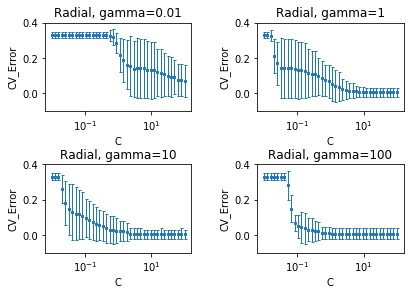

In [23]:
#kernel=‘rbf’
##gamma=0.01, 1, 10 and 100
svm_2d_rbf_gamma_models = [cv_err('rbf',2,gamma=0.01),cv_err('rbf',2,gamma=1),
                           cv_err('rbf',2,gamma=10),cv_err('rbf',2,gamma=100)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_10.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=1','Radial, gamma=10','Radial, gamma=100'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

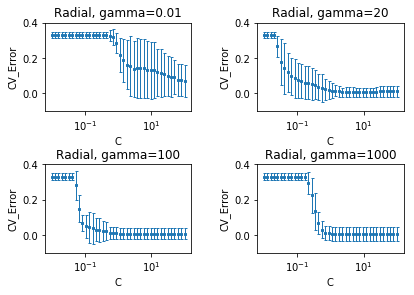

In [24]:
#kernel=‘rbf’
##gamma=0.01, 20, 100 and 1000
svm_2d_rbf_gamma_models = [cv_err('rbf',2,gamma=0.01),cv_err('rbf',2,gamma=20),
                           cv_err('rbf',2,gamma=100),cv_err('rbf',2,gamma=1000)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_extra.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=20','Radial, gamma=100','Radial, gamma=1000'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

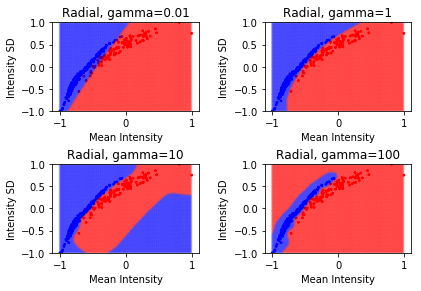

In [25]:
#radial with different gammas 
svm_2d_rad_g001 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=0.01)),gamma=0.01)
svm_2d_rad_g1 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=1)),gamma=1)
svm_2d_rad_g10 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=10)),gamma=10)
svm_2d_rad_g100 = opt_model('rbf',c_opt(cv_err('rbf',2,gamma=100)),gamma=100)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_11.png',plotType=1,
     model= [svm_2d_rad_g001,svm_2d_rad_g1,svm_2d_rad_g10,svm_2d_rad_g100],
     subtitle=('Radial, gamma=0.01','Radial, gamma=1','Radial, gamma=10','Radial, gamma=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

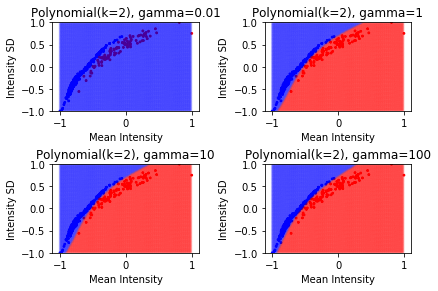

In [26]:
svm_2d_poly2_g001 = opt_model('poly',c_opt(cv_err('poly',2,gamma=0.01)),gamma=0.01)
svm_2d_poly2_g1 = opt_model('poly',c_opt(cv_err('poly',2,gamma=1)),gamma=1)
svm_2d_poly2_g10 = opt_model('poly',c_opt(cv_err('poly',2,gamma=10)),gamma=10)
svm_2d_poly2_g100 = opt_model('poly',c_opt(cv_err('poly',2,gamma=100)),gamma=100)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_12.png',plotType=1,
     model= [svm_2d_poly2_g001,svm_2d_poly2_g1,svm_2d_poly2_g10,svm_2d_poly2_g100],
     subtitle=('Polynomial(k=2), gamma=0.01','Polynomial(k=2), gamma=1',
               'Polynomial(k=2), gamma=10','Polynomial(k=2), gamma=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

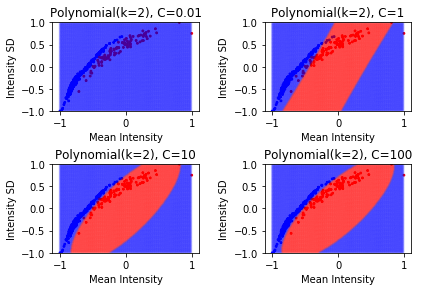

In [27]:
svm_2d_poly2_C001 = SVC(C=0.01,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C1 = SVC(C=1,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C10 = SVC(C=10,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
svm_2d_poly2_C100 = SVC(C=100,kernel='poly',degree=2,gamma='scale').fit(simpleTrain,trainDigits)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_13.png',plotType=1,
     model= [svm_2d_poly2_C001,svm_2d_poly2_C1,svm_2d_poly2_C10,svm_2d_poly2_C100],
     subtitle=('Polynomial(k=2), C=0.01','Polynomial(k=2), C=1',
               'Polynomial(k=2), C=10','Polynomial(k=2), C=100'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

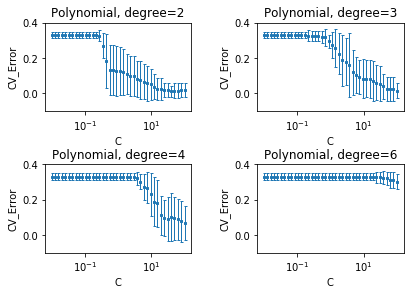

In [28]:
#cv_err_2d_poly2 = cv_err('poly', 2, gamma='auto', degree=2)
cv_err_2d_poly3 = cv_err('poly', 2, gamma='auto', degree=3)
cv_err_2d_poly4 = cv_err('poly', 2, gamma='auto', degree=4)
cv_err_2d_poly6 = cv_err('poly', 2, gamma='auto', degree=6)
c_opt_2d_poly_models_2 = (cv_err_2d_poly2,cv_err_2d_poly3,cv_err_2d_poly4,cv_err_2d_poly6)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7b.png',plotType=2,model=c_opt_2d_poly_models_2,
     subtitle=('Polynomial, degree=2','Polynomial, degree=3',
              'Polynomial, degree=4','Polynomial, degree=6'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')